# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# MERVE AYER

# Data

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
# Read csv
data_raw = pd.read_csv('diamonds.csv')
data_raw



,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [6]:
data_raw.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [7]:
data_raw.describe(include = "O").T


,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065
price,53940,5,Very Low,34663


In [8]:
data_raw.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

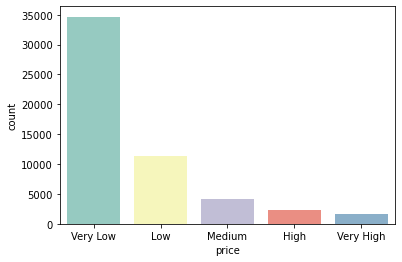

In [9]:
# Our label Distribution (countplot)
ax = sns.countplot(x="price", data=data_raw, palette="Set3")


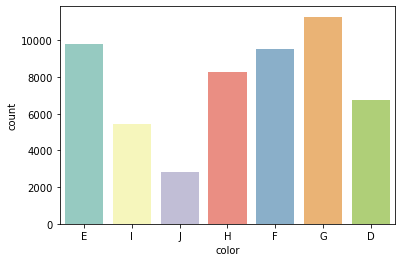

In [10]:
ax = sns.countplot(x="color", data=data_raw, palette="Set3")

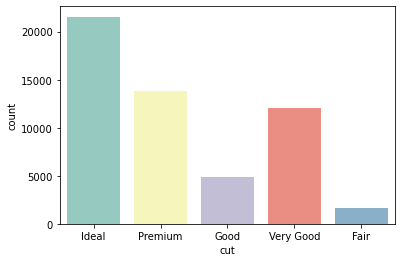

In [11]:
ax = sns.countplot(x="cut", data=data_raw, palette="Set3")

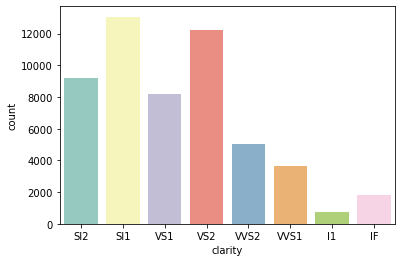

In [12]:
ax = sns.countplot(x="clarity", data=data_raw, palette="Set3")

/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

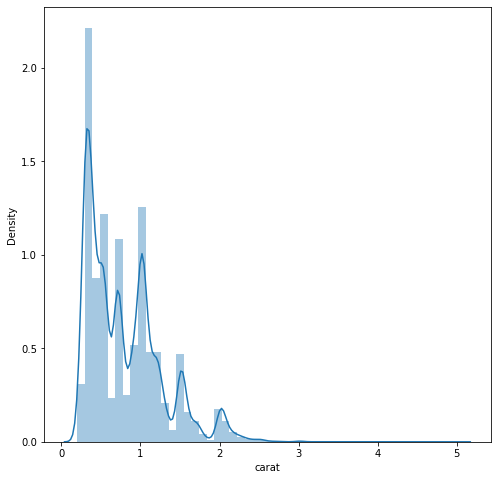

In [13]:
# Example EDA (distplot)
plt.figure(figsize=(8, 8))

sns.distplot(data_raw.carat)


/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

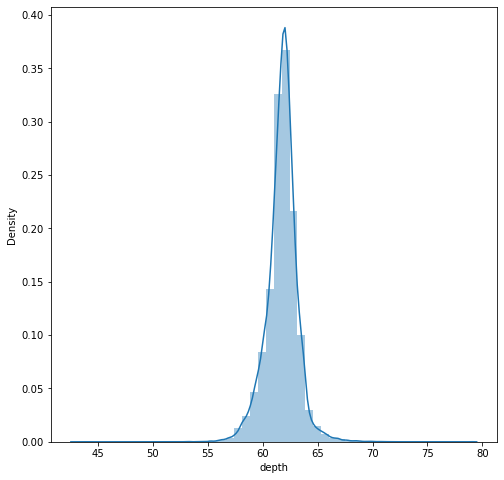

In [14]:
plt.figure(figsize=(8, 8))

sns.distplot(data_raw.depth)

/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

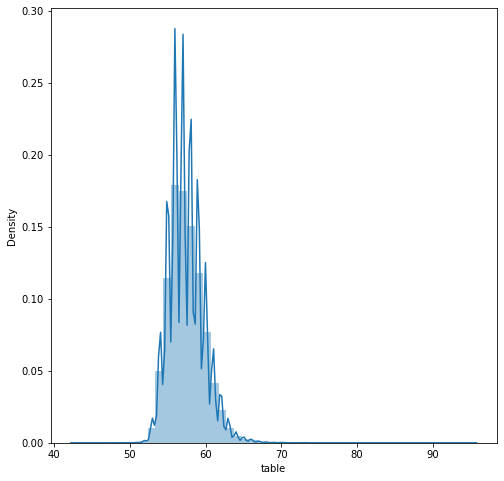

In [15]:
plt.figure(figsize=(8, 8))

sns.distplot(data_raw.table)

/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

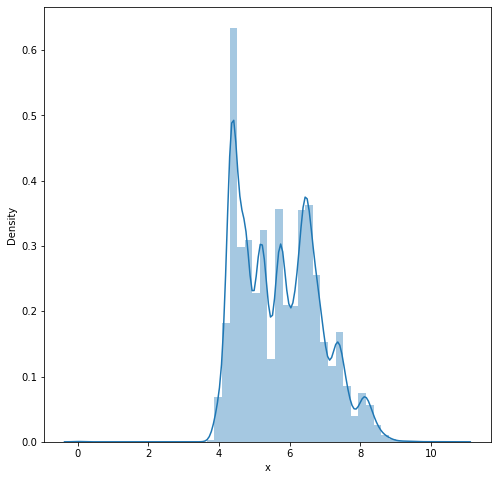

In [16]:
plt.figure(figsize=(8, 8))

sns.distplot(data_raw.x)

/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

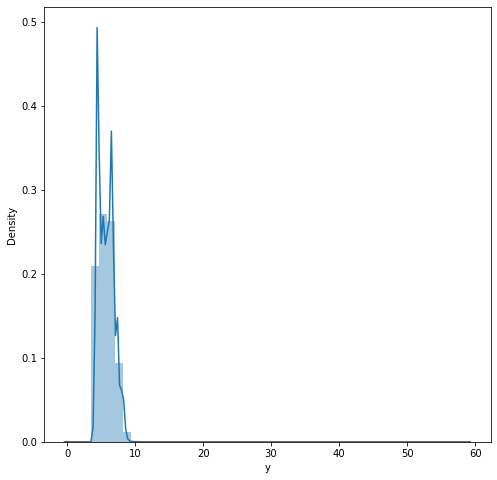

In [17]:
plt.figure(figsize=(8, 8))

sns.distplot(data_raw.y)

/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z', ylabel='Density'>

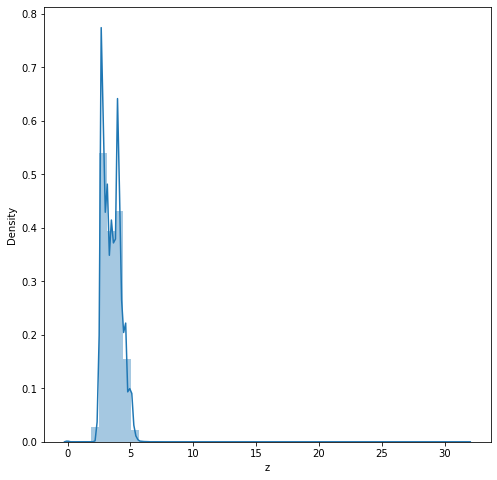

In [18]:
plt.figure(figsize=(8, 8))

sns.distplot(data_raw.z)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [19]:
data_raw = data_raw.drop(["index"], axis = 1)

data_raw.duplicated().sum()


342

In [20]:
data_raw = data_raw.drop_duplicates().reset_index(drop = True)

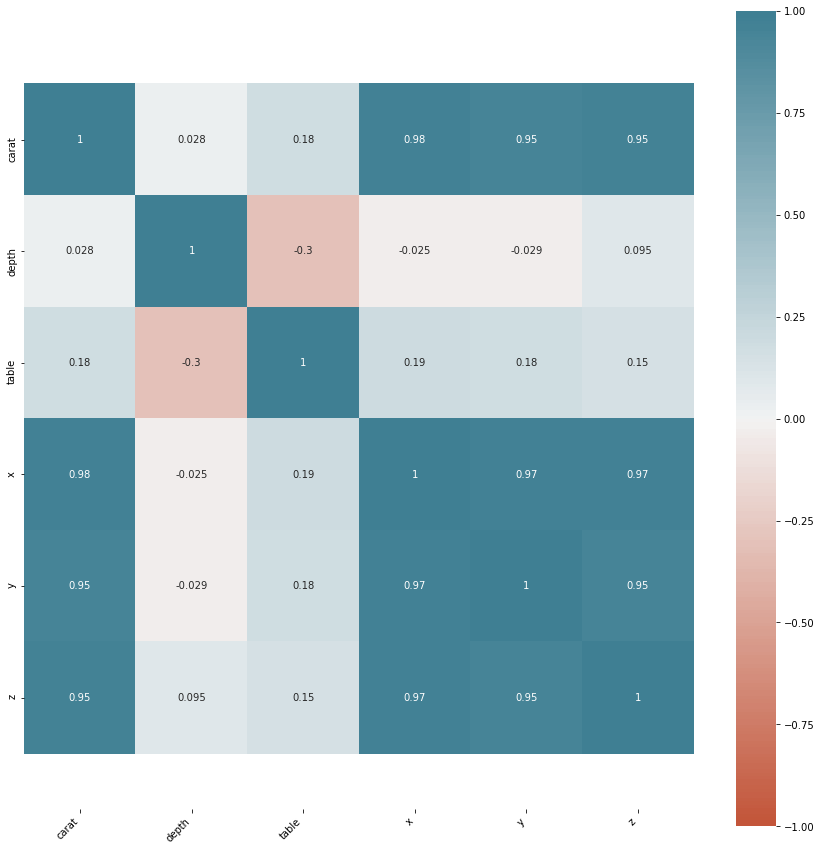

In [21]:
corr = data_raw.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [74]:
#new_df = data_raw.drop(["x","y","z"],axis=1)

new_df = data_raw.drop(data_raw[data_raw["x"]==0].index)
new_df = data_raw.drop(data_raw[data_raw["y"]==0].index)
new_df = data_raw.drop(data_raw[data_raw["z"]==0].index)
new_df.shape

(53579, 10)

In [77]:
new_df = new_df[(new_df["depth"]<75)&(new_df["depth"]>45)]
new_df = new_df[(new_df["table"]<80)&(new_df["table"]>40)]
new_df = new_df[(new_df["x"]<30)]
new_df = new_df[(new_df["y"]<30)]
new_df = new_df[(new_df["z"]<30)&(new_df["z"]>2)]
new_df.shape

(53567, 10)

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
new_df["price"] = label_encoder.fit_transform(new_df["price"])
new_df["cut"] = label_encoder.fit_transform(new_df["cut"])
new_df["clarity"] = label_encoder.fit_transform(new_df["clarity"]) 
new_df["color"] = label_encoder.fit_transform(new_df["color"]) 

new_df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,4
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,4
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,4
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,4
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,4
...,...,...,...,...,...,...,...,...,...,...
53593,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,4
53594,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,4
53595,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,4
53596,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,4


In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.index = X.index
X_scaled.head()

,carat,cut,color,clarity,depth,table,price
0,-1.227070,-0.600763,-0.929120,-0.498618,-0.193775,-1.132903,0.698779
1,-1.271624,0.409864,-0.929120,-1.079812,-1.531102,1.722165,0.698779
2,-1.093409,0.409864,1.433935,0.663771,0.514222,0.294631,0.698779
3,-1.048855,-1.611390,2.024698,-0.498618,1.222218,0.294631,0.698779
4,-1.204793,1.420490,2.024698,1.826160,0.828887,-0.181214,0.698779


In [85]:
X, y = new_df.iloc[: , :-1], new_df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Decision Tree Algorithm

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

train_scores, test_scores = list(), list()

values = [i for i in range(1, 10)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i, random_state=42)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('max depth = %d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth


max depth = 1, train: 0.800, test: 0.801
max depth = 2, train: 0.828, test: 0.826
max depth = 3, train: 0.854, test: 0.856
max depth = 4, train: 0.867, test: 0.866
max depth = 5, train: 0.880, test: 0.879
max depth = 6, train: 0.895, test: 0.890
max depth = 7, train: 0.905, test: 0.897
max depth = 8, train: 0.924, test: 0.912
max depth = 9, train: 0.932, test: 0.916


In [93]:
# Calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

pred = model.predict(X_test)
print(classification_report(y_test,pred))
print("\n")
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       680
           1       0.87      0.88      0.87      3374
           2       0.78      0.76      0.77      1213
           3       0.73      0.67      0.70       484
           4       0.98      0.97      0.97     10320

    accuracy                           0.92     16071
   macro avg       0.80      0.79      0.79     16071
weighted avg       0.92      0.92      0.92     16071



Precision = 0.7964868598439521
Recall = 0.7922766745473346
Accuracy = 0.9156244166511107
F1 Score = 0.7939685817825343


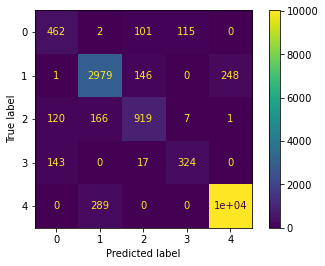

In [94]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show() 

When I first trained our train test, I encountered an overfitting problem. I check the preprocessing steps again to fix this problem. As a result of the changes I made, I got rid of the overfitting problem and trained our train data correctly.

# XGBoost Algorithm

In [103]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1],
    'n_estimators': [10,190,200]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)


print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))



/Users/merveayer/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:55:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 190}
Mean of the cv scores is 0.935433
Train Score 0.976104
Test Score 0.938274
Seconds used for refitting the best model on the train dataset: 8.815611


In [104]:
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))

Train Score 0.976104
Test Score 0.938274


In [98]:
# Calculate accuracy, recall, precision and f1 score.
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
print("\n")
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       680
           1       0.90      0.92      0.91      3374
           2       0.82      0.82      0.82      1213
           3       0.76      0.83      0.79       484
           4       0.99      0.98      0.98     10320

    accuracy                           0.94     16071
   macro avg       0.84      0.85      0.84     16071
weighted avg       0.94      0.94      0.94     16071



Precision = 0.8410294118842844
Recall = 0.8467302803018407
Accuracy = 0.9382739095264763
F1 Score = 0.8433589216017061


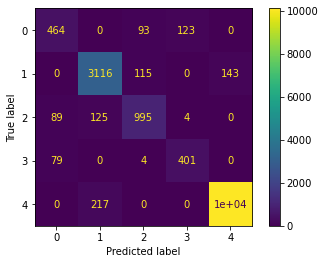

In [99]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

# Support Vector Machines (SVM)

In [101]:
from sklearn.svm import SVC
svmModel = SVC(probability=True, gamma='scale', kernel='poly')
svmModel.fit(X_train, y_train)
y_predict = svmModel.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_predict)

print("\nClassification report for Support Vector Machine: \n", classification_report(y_test, y_predict))
print("\n")
print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))
print("F1 Score = {}".format(f1_score(y_test, y_predict,average='macro')))


Classification report for Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.35      0.31      0.33       680
           1       0.73      0.92      0.82      3374
           2       0.50      0.54      0.52      1213
           3       0.64      0.01      0.03       484
           4       0.98      0.95      0.96     10320

    accuracy                           0.85     16071
   macro avg       0.64      0.55      0.53     16071
weighted avg       0.86      0.85      0.84     16071



Precision = 0.6411998665447453
Recall = 0.5459394536324416
Accuracy = 0.8548939082819986
F1 Score = 0.5316305072024419


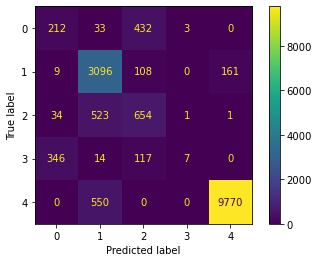

In [102]:
plot_confusion_matrix(svmModel, X_test, y_test)  
plt.show() 

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

I implemented decision tree algorithm, XGBoost algoritm and SVM algorithm. The best performing model is XGBoost algorithm according to accuracy score(94%), then decision tree algorithm accuracy score(92%), after that SVM algorithm accuracy score(85%). In the decision tree algorithm, I observed that as the max depth value increases, the accuracy value also increases. I can improve model applying ensemble methods.